
Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Descripción estadística:
       fixed acidity  volatile acidity  citric acid  residual sugar  

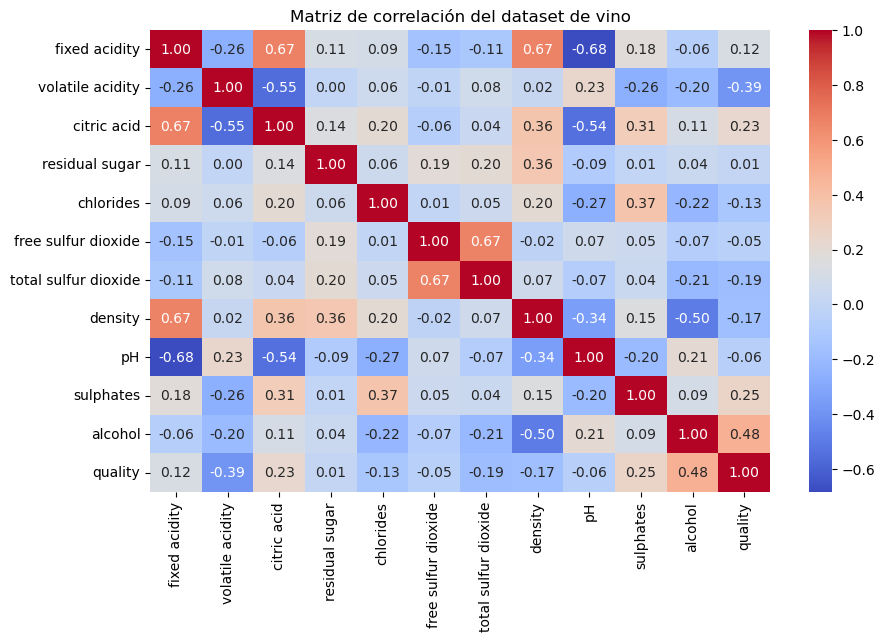

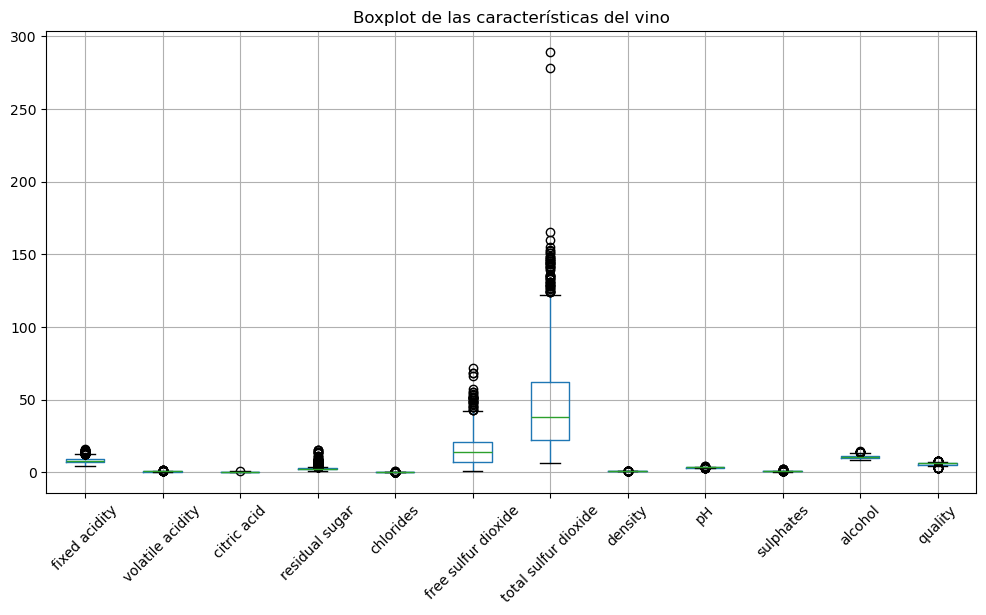

Características seleccionadas: ['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates', 'alcohol']

Decision Tree - Accuracy: 0.7219

Métricas de clasificación:
              precision    recall  f1-score   support

           0       0.65      0.79      0.72       141
           1       0.80      0.66      0.73       179

    accuracy                           0.72       320
   macro avg       0.73      0.73      0.72       320
weighted avg       0.74      0.72      0.72       320



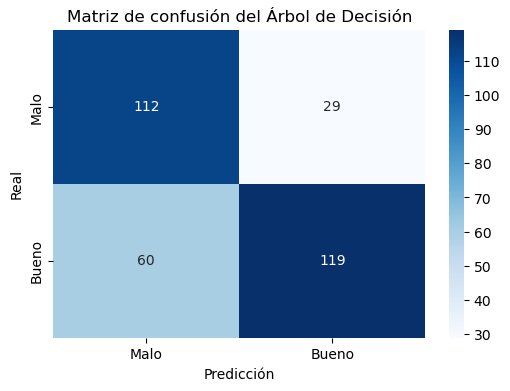


Análisis de Resultados:
El modelo de Árbol de Decisión obtuvo una precisión de 0.7219
Las características seleccionadas ayudaron a mejorar el rendimiento del modelo.
Se recomienda ajustar hiperparámetros como la profundidad del árbol para mejorar los resultados.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

# --- Cargar dataset ---
wine_df = pd.read_csv("winequality-red.csv")  # Reemplazar con el path correcto

# --- Análisis exploratorio ---
print("\nInformación del dataset:")
print(wine_df.info())
print("\nDescripción estadística:")
print(wine_df.describe())

# Visualizar correlación entre variables
plt.figure(figsize=(10, 6))
sns.heatmap(wine_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de correlación del dataset de vino")
plt.show()

# Identificar valores atípicos con boxplots
plt.figure(figsize=(12, 6))
wine_df.boxplot(rot=45)
plt.title("Boxplot de las características del vino")
plt.show()

# --- Preprocesamiento ---
wine_df.dropna(inplace=True)

# Convertir la calidad del vino en una clasificación binaria (bueno/malo)
wine_df["quality"] = wine_df["quality"].apply(lambda q: 1 if q >= 6 else 0)

# --- Selección de características ---
X = wine_df.drop(columns=["quality"])
y = wine_df["quality"]
selector = SelectKBest(score_func=f_classif, k=5)  # Seleccionamos las 5 mejores características
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features.tolist())

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# --- Entrenar Árbol de Decisión ---
model = DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --- Evaluación ---
accuracy = accuracy_score(y_test, y_pred)
print(f"\nDecision Tree - Accuracy: {accuracy:.4f}")
print("\nMétricas de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Malo', 'Bueno'], yticklabels=['Malo', 'Bueno'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión del Árbol de Decisión")
plt.show()

# --- Interpretación y análisis ---
print("\nAnálisis de Resultados:")
print("El modelo de Árbol de Decisión obtuvo una precisión de", round(accuracy, 4))
print("Las características seleccionadas ayudaron a mejorar el rendimiento del modelo.")
print("Se recomienda ajustar hiperparámetros como la profundidad del árbol para mejorar los resultados.")
